In [3]:
using JLD
using PyPlot
using Statistics
using StatsBase 
using LinearAlgebra
using KernelDensity

┌ Info: Precompiling JLD [4138dd39-2aa7-5051-a626-17a0bb65d9c8]
└ @ Base loading.jl:1278


In [6]:
using JLD2
using FileIO

In [7]:
data = load("../data/experiment/images.jld")

Dict{String,Any} with 5 entries:
  "ImagesIS2"   => [0 0 … 0 0; 0 0 … 0 0; … ; 43 33 … 35 15; 23 140 … 44 28]…
  "ImagesBTV50" => [10 3 … 0 0; 3 0 … 0 0; … ; 6 0 … 0 0; 4 0 … 0 0]…
  "charge"      => [0.1298, 0.1712, 0.095, 0.0433, 0.097, 0.136, 0.1404, 0.1837…
  "ImagesBTV26" => [81 24 … 14 0; 70 49 … 37 0; … ; 38 54 … 23 3; 69 22 … 23 4]…
  "ImagesBTV53" => [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 21 0; 0 0 … 0 0]…

In [8]:
cam_1 = data["ImagesBTV50"]
cam_2 = data["ImagesBTV53"]
cam_3  = data["ImagesBTV26"]
cam_4 = data["ImagesIS2"]
charge  = data["charge"]

enumerate_events = collect(1:length(charge));

In [9]:
intensity(x) = [sum(x, dims=(2, 3))...]

intensity (generic function with 1 method)

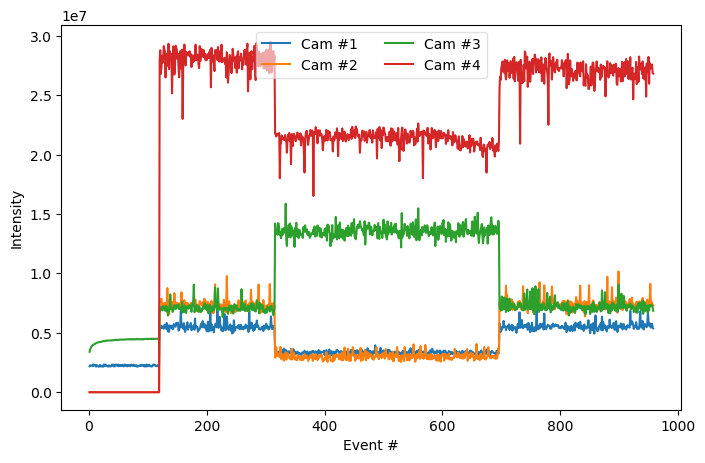

PyObject Text(0.5, 24.0, 'Event #')

In [10]:
fig, ax = plt.subplots(1,1, figsize=(8,5))

ax.plot(enumerate_events, intensity(cam_1), label="Cam #1")
ax.plot(enumerate_events, intensity(cam_2), label="Cam #2")
ax.plot(enumerate_events, intensity(cam_3), label="Cam #3")
ax.plot(enumerate_events, intensity(cam_4), label="Cam #4")

ax.legend(loc="upper center", frameon=true, framealpha=0.6, ncol=2, )

ax.set_ylabel("Intensity", )
ax.set_xlabel("Event #")

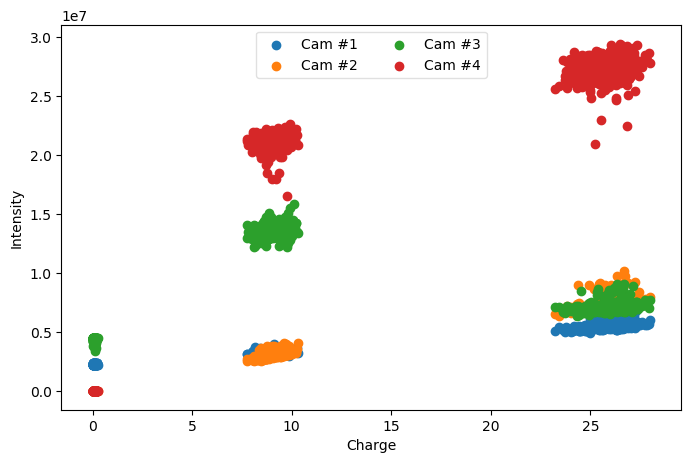

PyObject Text(0.5, 24.0, 'Charge')

In [11]:
fig, ax = plt.subplots(1,1, figsize=(8,5))

ax.scatter(charge, intensity(cam_1), label="Cam #1")
ax.scatter(charge, intensity(cam_2), label="Cam #2")
ax.scatter(charge, intensity(cam_3), label="Cam #3")
ax.scatter(charge, intensity(cam_4), label="Cam #4")

ax.legend(loc="upper center", frameon=true, framealpha=0.6, ncol=2, )

ax.set_ylabel("Intensity", )
ax.set_xlabel("Charge")

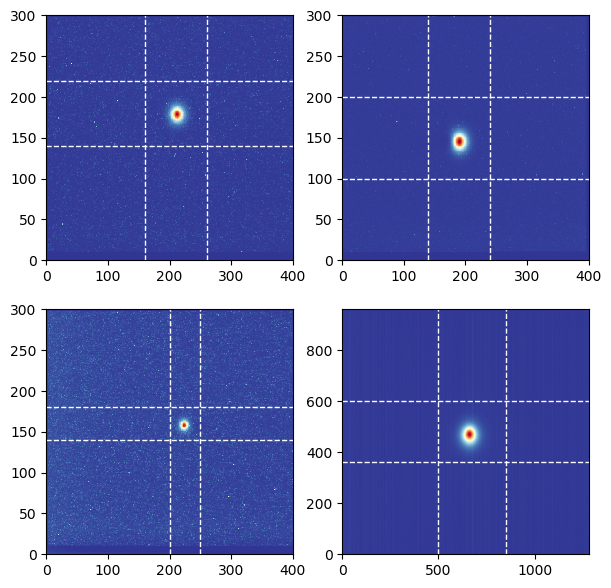

PyObject <matplotlib.lines.Line2D object at 0x7f970500e590>

In [13]:
cam_1_frame = (x=(160, 260), y=(140, 220))
cam_2_frame = (x=(140, 240), y=(100, 200))
cam_3_frame = (x=(200, 250), y=(140, 180))
cam_4_frame = (x=(500, 850), y=(360, 600))

fig, ax = plt.subplots(2,2, figsize=(7,7))

fig.subplots_adjust(hspace=0.2, wspace=0.2)

ax[1,1].pcolormesh(mean(cam_1, dims=1)[1,:,:], cmap="RdYlBu_r")
ax[1,1].axvline(cam_1_frame.x[1], c="white", label="Truth", alpha=1, lw=1, ls="--")
ax[1,1].axvline(cam_1_frame.x[2], c="white", label="Truth", alpha=1, lw=1, ls="--")
ax[1,1].axhline(cam_1_frame.y[1], c="white", label="Truth", alpha=1, lw=1, ls="--")
ax[1,1].axhline(cam_1_frame.y[2], c="white", label="Truth", alpha=1, lw=1, ls="--")

ax[1,2].pcolormesh(mean(cam_2, dims=1)[1,:,:], cmap="RdYlBu_r")
ax[1,2].axvline(cam_2_frame.x[1], c="white", label="Truth", alpha=1, lw=1, ls="--")
ax[1,2].axvline(cam_2_frame.x[2], c="white", label="Truth", alpha=1, lw=1, ls="--")
ax[1,2].axhline(cam_2_frame.y[1], c="white", label="Truth", alpha=1, lw=1, ls="--")
ax[1,2].axhline(cam_2_frame.y[2], c="white", label="Truth", alpha=1, lw=1, ls="--")

ax[2,1].pcolormesh(mean(cam_3, dims=1)[1,:,:], cmap="RdYlBu_r")
ax[2,1].axvline(cam_3_frame.x[1], c="white", label="Truth", alpha=1, lw=1, ls="--")
ax[2,1].axvline(cam_3_frame.x[2], c="white", label="Truth", alpha=1, lw=1, ls="--")
ax[2,1].axhline(cam_3_frame.y[1], c="white", label="Truth", alpha=1, lw=1, ls="--")
ax[2,1].axhline(cam_3_frame.y[2], c="white", label="Truth", alpha=1, lw=1, ls="--")

ax[2,2].pcolormesh(mean(cam_4, dims=1)[1,:,:], cmap="RdYlBu_r")
ax[2,2].axvline(cam_4_frame.x[1], c="white", label="Truth", alpha=1, lw=1, ls="--")
ax[2,2].axvline(cam_4_frame.x[2], c="white", label="Truth", alpha=1, lw=1, ls="--")
ax[2,2].axhline(cam_4_frame.y[1], c="white", label="Truth", alpha=1, lw=1, ls="--")
ax[2,2].axhline(cam_4_frame.y[2], c="white", label="Truth", alpha=1, lw=1, ls="--")


# Info, Camera #1: 

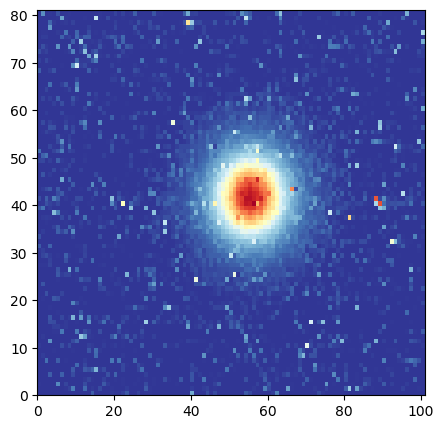

PyObject <matplotlib.collections.QuadMesh object at 0x7f9704ad6310>

In [14]:
fig, ax = plt.subplots(1,1, figsize=(5,5))

ax.pcolormesh(cam_1[150,:,:][cam_1_frame.y[1]:cam_1_frame.y[2],cam_1_frame.x[1]:cam_1_frame.x[2]], 
    cmap="RdYlBu_r")

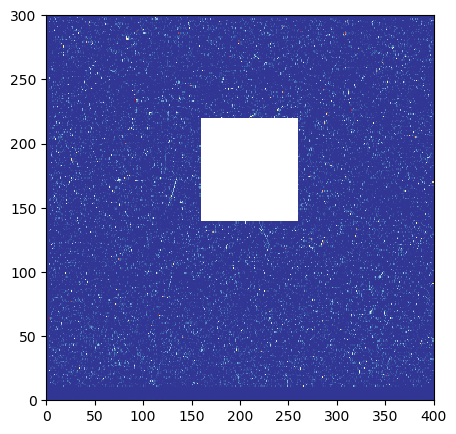

PyObject <matplotlib.collections.QuadMesh object at 0x7f9706eece10>

In [15]:
fig, ax = plt.subplots(1,1, figsize=(5,5))

data_tmp = cam_1[150,:,:] .* 1.0
data_tmp[cam_1_frame.y[1]:cam_1_frame.y[2],cam_1_frame.x[1]:cam_1_frame.x[2]] .= NaN 

ax.pcolormesh(data_tmp, cmap="RdYlBu_r")

# Save Data from M1: 

In [16]:
event_mask = 5. .< charge .< 15.

cam_1_m1 = cam_1[event_mask,:,:]
cam_2_m1 = cam_2[event_mask,:,:]
cam_3_m1 = cam_3[event_mask,:,:]
cam_4_m1 = cam_4[event_mask,:,:]
charge_m1 = charge[event_mask] .* 1.0

cam_1_m1 = cam_1_m1[:,cam_1_frame.y[1]:cam_1_frame.y[2],cam_1_frame.x[1]:cam_1_frame.x[2]] .* 1.0
cam_2_m1 = cam_2_m1[:,cam_2_frame.y[1]:cam_2_frame.y[2],cam_2_frame.x[1]:cam_2_frame.x[2]] .* 1.0
cam_3_m1 = cam_3_m1[:,cam_3_frame.y[1]:cam_3_frame.y[2],cam_3_frame.x[1]:cam_3_frame.x[2]] .* 1.0
cam_4_m1 = cam_4_m1[:,cam_4_frame.y[1]:cam_4_frame.y[2],cam_4_frame.x[1]:cam_4_frame.x[2]] .* 1.0;

# FileIO.save("Experiment_Data/Experiment/measurement-1.jld2", 
#     Dict("cam_1" => cam_1_m1, 
#         "cam_2" => cam_2_m1, 
#         "cam_3" => cam_3_m1, 
#         "cam_4" => cam_4_m1, 
#         "charge" => charge_m1))

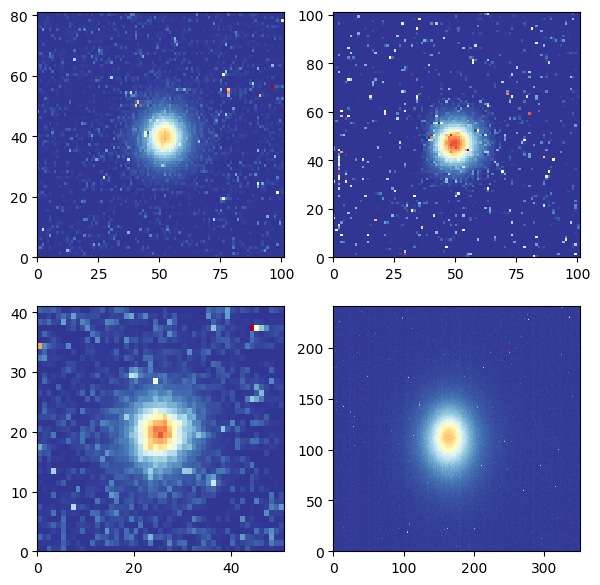

PyObject <matplotlib.collections.QuadMesh object at 0x7f9481ac8d50>

In [18]:
fig, ax = plt.subplots(2,2, figsize=(7,7))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

ax[1,1].pcolormesh(cam_1_m1[210,:,:], cmap="RdYlBu_r")
ax[1,2].pcolormesh(cam_2_m1[210,:,:], cmap="RdYlBu_r")
ax[2,1].pcolormesh(cam_3_m1[210,:,:], cmap="RdYlBu_r")
ax[2,2].pcolormesh(cam_4_m1[210,:,:], cmap="RdYlBu_r")

# Noise Distribution: 

In [19]:
# noise: 
bins = 0:1:4000

event_mask = 5. .<charge .< 15.

data_temp = cam_1[event_mask,:,:]

pixel_mask = trues(size(data_temp))
pixel_mask[:,cam_1_frame.y[1]:cam_1_frame.y[2],cam_1_frame.x[1]:cam_1_frame.x[2]] .= false

histogram_noise = fit(Histogram, data_temp[pixel_mask], bins, closed=:left)
histogram_noise = normalize(histogram_noise, mode=:probability)

kde_noise = kde(data_temp[pixel_mask]);

In [20]:
histogram_signal = fit(Histogram, data_temp[.!pixel_mask], bins, closed=:left)
histogram_signal = normalize(histogram_signal, mode=:probability)

kde_signal = kde(data_temp[.!pixel_mask]);

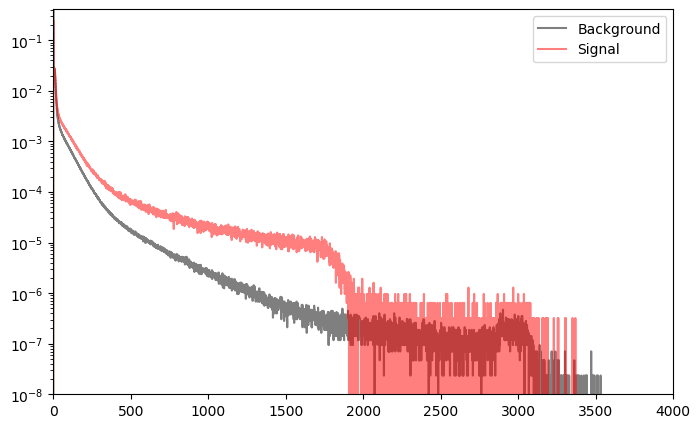

PyObject <matplotlib.legend.Legend object at 0x7f9482348d10>

In [21]:
fig, ax = plt.subplots(1,1, figsize=(8,5))

ax.step(histogram_noise.edges[1],  vcat([0], histogram_noise.weights), alpha=0.5, color="black", label = "Background")
ax.step(histogram_signal.edges[1],  vcat([0], histogram_signal.weights), alpha=0.5, color="red", label = "Signal")
# ax.plot(bins, pdf(kde_noise, collect(bins)), color="gray", alpha=0.2, label = "KDE Background")
# ax.plot(bins, pdf(kde_signal, collect(bins)), color="gray", alpha=0.5, label = "KDE Signal")
# ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(0,4000)
ax.set_ylim(10e-9,maximum(histogram_noise.weights))

ax.legend(loc="upper right" )

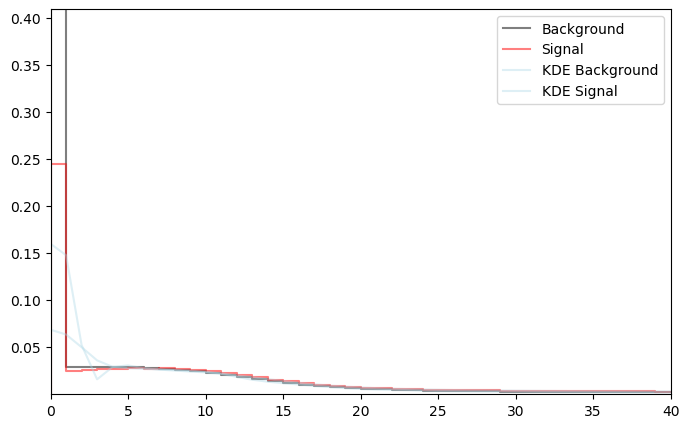

PyObject <matplotlib.legend.Legend object at 0x7f9388faf150>

In [22]:
fig, ax = plt.subplots(1,1, figsize=(8,5))

ax.step(histogram_noise.edges[1],  vcat([0], histogram_noise.weights), alpha=0.5, color="black", label = "Background")
ax.step(histogram_signal.edges[1],  vcat([0], histogram_signal.weights), alpha=0.5, color="red", label = "Signal")
ax.plot(bins, pdf(kde_noise, collect(bins)), color="lightblue", alpha=0.4, label = "KDE Background")
ax.plot(bins, pdf(kde_signal, collect(bins)), color="lightblue", alpha=0.4, label = "KDE Signal")
# ax.set_xscale("log")
# ax.set_yscale("log")
ax.set_xlim(0,40)
ax.set_ylim(10e-9,maximum(histogram_noise.weights))

ax.legend(loc="upper right" )

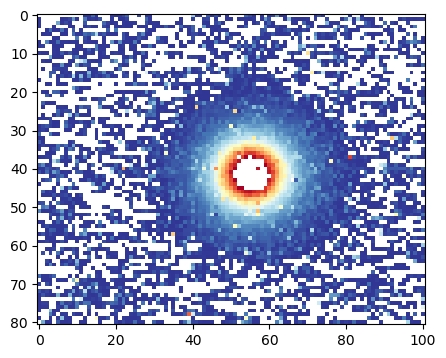

PyObject <matplotlib.image.AxesImage object at 0x7f9481ae1a90>

In [23]:
fig, ax = plt.subplots(1,1, figsize=(5,5))

data_tmp_1 = cam_1[150,:,:][cam_1_frame.y[1]:cam_1_frame.y[2],cam_1_frame.x[1]:cam_1_frame.x[2]]

ax.imshow(replace(x->0 < x< 2500 ? x : NaN, data_tmp_1.*1.0), cmap="RdYlBu_r")

# Histograms Demo: 

In [24]:
x = [0, 1, 1, 2, 1, 2, 3, 4, 4, 7]
histogram_test_1 = fit(Histogram, x, 0:1:8, closed=:left) # maximum + delts
histogram_test_2 = normalize(histogram_test_1, mode=:probability); # * number of elements == 1

In [25]:
@show histogram_test_1.edges
@show histogram_test_1.weights;

histogram_test_1.edges = (0:1:8,)
histogram_test_1.weights = [1, 3, 2, 1, 2, 0, 0, 1]


In [26]:
@show histogram_test_2.edges
@show histogram_test_2.weights;

histogram_test_2.edges = (0:1:8,)
histogram_test_2.weights = [0.1, 0.30000000000000004, 0.2, 0.1, 0.2, 0.0, 0.0, 0.1]


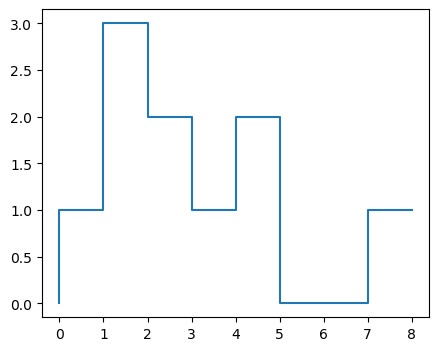

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f9388995c50>

In [27]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

ax.step(histogram_test_1.edges[1], vcat([0], histogram_test_1.weights))